<a href="https://colab.research.google.com/github/levilira/analise_vendas_combustivel/blob/main/projeto_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [33]:
df = pd.read_csv("/content/vendas-derivados-petroleo-etanol-m3-1990-2021.csv", sep=";", error_bad_lines = False)

In [34]:
df.head(5)

,ANO,MÊS,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO,VENDAS
0,2014,MAI,REGIÃO SUL,RIO GRANDE DO SUL,ETANOL HIDRATADO,"8610,058"
1,2014,DEZ,REGIÃO SUL,SANTA CATARINA,ETANOL HIDRATADO,"13112,116"
2,2014,ABR,REGIÃO SUL,RIO GRANDE DO SUL,ETANOL HIDRATADO,"8462,275"
3,2014,JAN,REGIÃO CENTRO-OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,"14524,016"
4,2014,MAR,REGIÃO SUL,RIO GRANDE DO SUL,ETANOL HIDRATADO,"8190,755"


In [35]:
df.columns

Index(['ANO', 'MÊS', 'GRANDE REGIÃO', 'UNIDADE DA FEDERAÇÃO', 'PRODUTO',
       'VENDAS'],
      dtype='object')

In [36]:
df.dtypes

ANO                      int64
MÊS                     object
GRANDE REGIÃO           object
UNIDADE DA FEDERAÇÃO    object
PRODUTO                 object
VENDAS                  object
dtype: object

In [37]:
df.isnull().sum()

ANO                     0
MÊS                     0
GRANDE REGIÃO           0
UNIDADE DA FEDERAÇÃO    0
PRODUTO                 0
VENDAS                  0
dtype: int64

In [38]:
df['VENDAS'] = df['VENDAS'].apply(lambda x: str(x).replace(",","."))

In [57]:
df['VENDAS'] = df['VENDAS'].astype('float64')

In [56]:
df['ANO'] = df['ANO'].astype('object')

In [41]:
df.dtypes

ANO                      object
MÊS                      object
GRANDE REGIÃO            object
UNIDADE DA FEDERAÇÃO     object
PRODUTO                  object
VENDAS                  float64
dtype: object

In [42]:
df['VENDAS'].mean()

40173.49507094353

In [43]:
df['VENDAS'].min()

-56.76928894

In [44]:
df.groupby("GRANDE REGIÃO")["VENDAS"].sum()

GRANDE REGIÃO
REGIÃO CENTRO-OESTE    338586125.818
REGIÃO NORDESTE        529503067.685
REGIÃO NORTE           244304900.838
REGIÃO SUDESTE        1599357521.338
REGIÃO SUL             594366334.679
Name: VENDAS, dtype: float64

In [45]:
df.groupby("UNIDADE DA FEDERAÇÃO")["VENDAS"].sum()

UNIDADE DA FEDERAÇÃO
ACRE                    8859839.305
ALAGOAS                25385976.708
AMAPÁ                   9526367.174
AMAZONAS               59293697.361
BAHIA                 169744750.517
CEARÁ                  67777463.655
DISTRITO FEDERAL       55069004.356
ESPÍRITO SANTO         65791840.251
GOIÁS                 133142872.979
MARANHÃO               59309520.682
MATO GROSSO            92148463.572
MATO GROSSO DO SUL     58225784.911
MINAS GERAIS          364732145.623
PARANÁ                247205109.551
PARAÍBA                35715722.713
PARÁ                   99596400.259
PERNAMBUCO             91691504.684
PIAUÍ                  25849170.672
RIO DE JANEIRO        220552511.340
RIO GRANDE DO NORTE    32844922.973
RIO GRANDE DO SUL     208531531.009
RONDÔNIA               32485790.041
RORAIMA                 7284129.290
SANTA CATARINA        138629694.119
SERGIPE                21184035.080
SÃO PAULO             948281024.124
TOCANTINS              27258677.407
Name: V

In [46]:
pd.set_option('float_format', '{:.3f}'.format)

In [47]:
df.groupby("UNIDADE DA FEDERAÇÃO")["VENDAS"].sum()

UNIDADE DA FEDERAÇÃO
ACRE                    8859839.305
ALAGOAS                25385976.708
AMAPÁ                   9526367.174
AMAZONAS               59293697.361
BAHIA                 169744750.517
CEARÁ                  67777463.655
DISTRITO FEDERAL       55069004.356
ESPÍRITO SANTO         65791840.251
GOIÁS                 133142872.979
MARANHÃO               59309520.682
MATO GROSSO            92148463.572
MATO GROSSO DO SUL     58225784.911
MINAS GERAIS          364732145.623
PARANÁ                247205109.551
PARAÍBA                35715722.713
PARÁ                   99596400.259
PERNAMBUCO             91691504.684
PIAUÍ                  25849170.672
RIO DE JANEIRO        220552511.340
RIO GRANDE DO NORTE    32844922.973
RIO GRANDE DO SUL     208531531.009
RONDÔNIA               32485790.041
RORAIMA                 7284129.290
SANTA CATARINA        138629694.119
SERGIPE                21184035.080
SÃO PAULO             948281024.124
TOCANTINS              27258677.407
Name: V

In [48]:
df.describe()

,VENDAS
count,82296.000
mean,40173.495
std,99315.387
min,-56.769
25%,304.020
50%,7148.808
75%,33956.824
max,1272781.396


In [28]:
df.groupby("GRANDE REGIÃO")["VENDAS"].sum()

GRANDE REGIÃO
REGIÃO CENTRO-OESTE    338586125.818
REGIÃO NORDESTE        529503067.685
REGIÃO NORTE           244304900.838
REGIÃO SUDESTE        1599357521.338
REGIÃO SUL             594366334.679
Name: VENDAS, dtype: float64

In [29]:
df.groupby("ANO")["VENDAS"].sum()

ANO
1990    72997178.789
1991    70049243.820
1992    68758843.506
1993    71351348.678
1994    74558939.488
1995    79881993.142
1996    86716992.939
1997    88885824.283
1998    92007593.520
1999    92054878.857
2000    89817744.275
2001    89624698.437
2002    88496736.979
2003    83734363.179
2004    88419801.742
2005    88807391.635
2006    90672793.972
2007    97785714.714
2008   105972512.908
2009   108802853.781
2010   117951824.429
2011   122233802.629
2012   129688678.360
2013   137331907.424
2014   144582773.520
2015   141816481.052
2016   135441653.806
2017   136087820.823
2018   136156401.169
2019   140135095.673
2020   131768990.644
2021   103525072.186
Name: VENDAS, dtype: float64

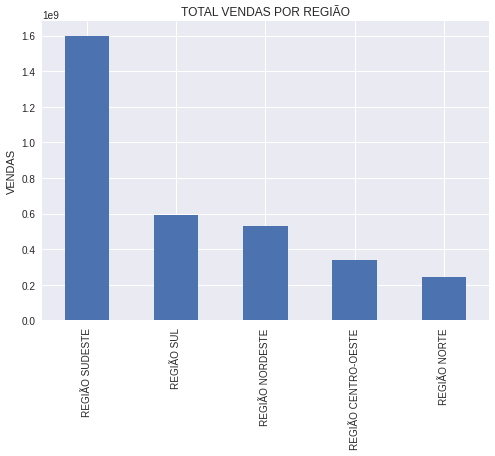

In [54]:
df.groupby("GRANDE REGIÃO")["VENDAS"].sum().sort_values(ascending=False).plot.bar(title="TOTAL VENDAS POR REGIÃO")
plt.xlabel("")
plt.ylabel("VENDAS");

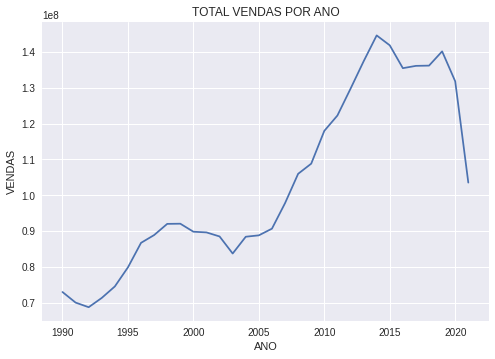

In [67]:
df.groupby("ANO")["VENDAS"].sum().plot(title="TOTAL VENDAS POR ANO")
plt.xlabel("ANO")
plt.ylabel("VENDAS");

In [78]:
df.groupby("PRODUTO")["VENDAS"].sum()

PRODUTO
ETANOL HIDRATADO        341559813.347
GASOLINA C              865637346.466
GASOLINA DE AVIAÇÃO       2033047.893
GLP                     380752703.455
QUEROSENE DE AVIAÇÃO    160528428.750
QUEROSENE ILUMINANTE      3117639.895
ÓLEO COMBUSTÍVEL        206397138.609
ÓLEO DIESEL            1346091831.943
Name: VENDAS, dtype: float64

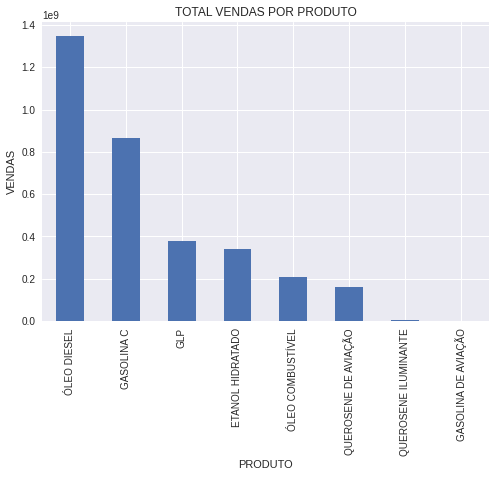

In [76]:
df.groupby("PRODUTO")["VENDAS"].sum().sort_values(ascending=False).plot.bar(title="TOTAL VENDAS POR PRODUTO")
plt.xlabel("PRODUTO")
plt.ylabel("VENDAS");

In [79]:
df.to_csv("df_vendas_novo.csv", index=False), 

(None,)